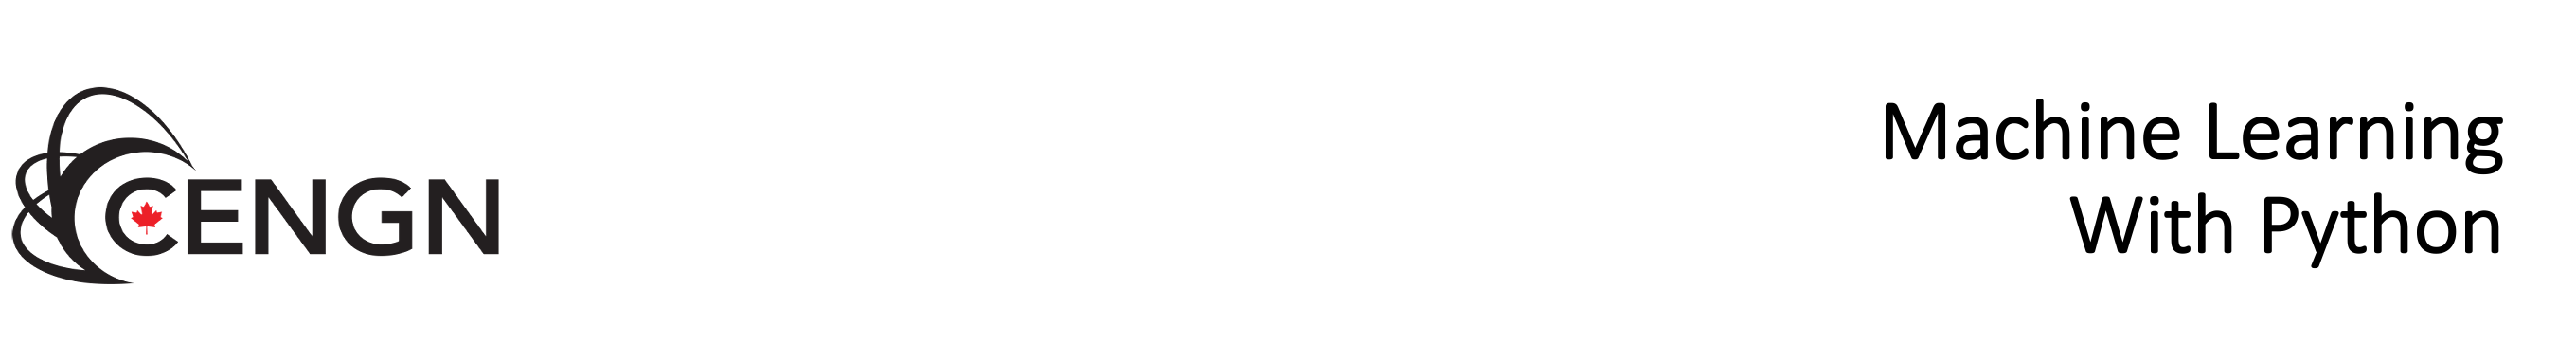
___

# **Section 3.5. Hands-on Classification**

In this section, we will implement the logistic regression classification model using the popular Sklearn library.

## **Lab 3. Logistic Regression**


**Step 1: Importing Libraries**

The first step is to import all relevant libraries and modules, and then load the dataset `breastcancer.csv.` In Module 2, we introduced `Matplotlib` as a useful library for data visualization. `Seaborn` is another Python data visualization library which is based on `Matplotlib`. It is also a useful library to be familiar with for more advanced visualization tasks. Refer to [Seaborn's documentation](https://seaborn.pydata.org/) for more details.

In [1]:
# Import relevant libraries

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, plot_confusion_matrix, classification_report)
from sklearn.linear_model import LogisticRegression
  
print('Libraries have been imported.')

Libraries have been imported.


Note that `%matplotlib inline` is used to display the actual Matplotlib plots in the browser.

**Step 2: Importing the Dataset**

In [2]:
# Import the breastcancer.csv dataset 

cancer = pd.read_csv('breastcancer.csv')

**Step 3: Inspecting Data**

It is a good idea as always to do some data exploration before we jump into the model.

In [3]:
# Display last 10 rows

cancer.tail(10)

,id,name,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
559,ID925291,Aimee Rioux,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.1388,0.06570,39,0
560,ID925292,Natala Sheppard,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.1537,0.06171,45,0
561,ID925311,Leanora Arrizubieta,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.1060,0.05502,47,0
562,ID925622,Kattie Lima,NaN,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.2128,0.07152,51,1
563,ID926125,Sheelagh Gjurasic,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.2149,0.06879,59,1
564,ID926424,Liz Babb,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623,18,1
565,ID926682,Silvana Shen,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533,24,1
566,ID926954,Sunny Hiorns,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648,21,1
567,ID927241,Colline Beade,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016,41,1
568,ID92751,Rita Ryan blanco,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.1587,0.05884,37,0


Note that diagnosis is a binary feature having only '0' and '1' as values. '1' indicates that the tumor is malignant whereas '0' indicates it is benign.

Another helpful way to inspect data is to use the `describe()` functions. `describe()` is a pandas functions that displays a summary of statistics pertaining to the DataFrame columns. This allows us to get general idea about the dataset and to check for possible skewed values.

In [4]:
# Display a summary of statistics

cancer.describe().T 

,count,mean,std,min,25%,50%,75%,max
radius,498.0,14.326635,3.506881,7.76000,11.81750,13.46500,16.15500,28.11000
texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal_dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744
age,569.0,39.467487,13.604683,16.00000,27.00000,40.00000,52.00000,62.00000


It is also a good idea to use `data.info()` to obtain an overview of the entire dataset.

In [5]:
# Inspect the various columns (features) in the dataset

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    object 
 1   name               569 non-null    object 
 2   radius             498 non-null    float64
 3   texture            569 non-null    float64
 4   perimeter          569 non-null    float64
 5   area               569 non-null    float64
 6   smoothness         569 non-null    float64
 7   compactness        569 non-null    float64
 8   concavity          569 non-null    float64
 9   symmetry           569 non-null    float64
 10  fractal_dimension  569 non-null    float64
 11  age                569 non-null    int64  
 12  diagnosis          569 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


**Step 4: Cleaning the Data**

Another necessary step in most machine learning projects is to clean and pre-process the data. In our case, since the machine learning model does not need identifiable personal information such as IDs and names, drop the IDs and names from the data. Then quickly scan the dataset using the `data.head()` function. 

In [6]:
# Drop id and name columns

cancer.drop(['id', 'name'], axis = 1, inplace = True)

# axis informs whether to drop labels from rows (0) or columns (1).

# if inplace is set to False, it returns a copy, otherwise it performs the operation
# in place.

In [7]:
# View head of data to confirm columns are dropped 

cancer.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


**Step 5: Data Visualization**

Print out a histogram of the number of observations across different age groups, that is, how many observations do we have for each age of the patient? For example, you can set 25 bins. 

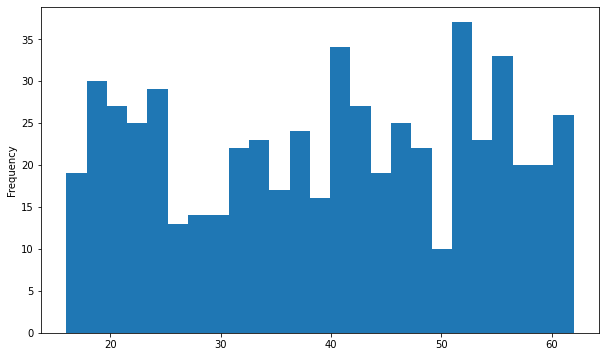

In [8]:
# Visualize the ages of the individuals using a histogram

cancer['age'].plot.hist(bins = 25, figsize = (10,6))

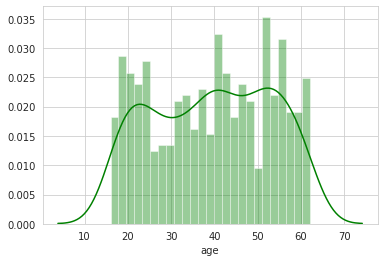

In [9]:
# Visualize the ages of the individuals using a Seaborn distribution plot 

sns.set_style(style='whitegrid')
sns.distplot(cancer['age'], color = 'green', bins = 25)

**Step 6: Defining the Variables**

Let us now create the appropriate y and X variables to feed into the machine learning model.

Split the data into predictor variables (all columns except 'diagnosis' column) and predicted variable (diagnosis). 

In [10]:
# Define the variables

X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']

In [11]:
# View head of predictors to confirm all predictor variables are stored correctly

X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age
0,NaN,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31
3,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20


In [12]:
# View head of predicted variable (diagnosis)

y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

**Step 7: Running the Model**

i. Run the logistic regression model using the function from Sklearn.

In [13]:
# Run logistic regression from Sklearn 

logreg = LogisticRegression()
logreg.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Why did the above not work? The error reads `Input contains NaN, infinity or a value too large for dtype('float64')`. That is, the data contains missing entries and logistic regression cannot be performed if some of the data entries have missing or null values. We forgot to deal with NaN values. So now, remove all rows with null that is `NaN` entries from the data and then implement the logistic regression.

In [14]:
# Drop rows having NaN values

cancer = cancer.dropna()

In [15]:
# Make sure NaN values were removed

cancer.isna().any()

radius               False
texture              False
perimeter            False
area                 False
smoothness           False
compactness          False
concavity            False
symmetry             False
fractal_dimension    False
age                  False
diagnosis            False
dtype: bool

In [16]:
# Define the variables

X = cancer.drop('diagnosis', axis = 1)
y = cancer['diagnosis']

In [17]:
# Run the model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', max_iter=2000)
logreg.fit(X, y)

# Predict the outcomes given the input features

y_pred = logreg.predict(X)

**Step 8: Evaluating the Model Performance**

Let us now evaluate the performance of our logistic regression model by obtaining the **confusion matrix** from sklearn.metrics as follows and computing the **accuracy score.**

Recall that the accuracy metric reveals how often the model's predictions are correct and the confusion matrix shows a visualization of the performance of an algorithm.

i. Obtain the confusion matrix.

In [18]:
conf = confusion_matrix(y, y_pred)
print(conf)

[[308  12]
 [ 29 149]]


ii. Plot the confusion matrix.

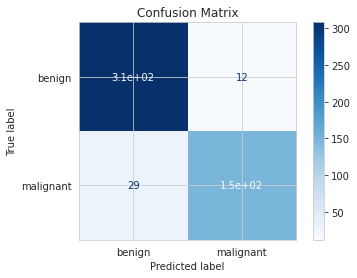

In [19]:
# Plot the confusion matrix

disp = plot_confusion_matrix(logreg, X, y,
display_labels=["benign","malignant"],                          
cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

iii. We will now obtain the accuracy score from the above confusion matrix. Recall that the accuracy score represents the correct classifications ratio, that is:
Number of correct predictions/Total number of predictions.

Where the number of correct predictions = True Positive + True Negative.

In [20]:
# Obtain the accuracy score

accuracy = (conf[0,0] + conf[1,1])/(conf[0,0]+conf[0,1]+conf[1,0]+conf[1,1])
print(accuracy)

0.9176706827309237


In [21]:
# Obtain the classification report

w = classification_report(y,y_pred, labels=[0,1], target_names=['benign','malignant'])
print(w)

              precision    recall  f1-score   support

      benign       0.91      0.96      0.94       320
   malignant       0.93      0.84      0.88       178

    accuracy                           0.92       498
   macro avg       0.92      0.90      0.91       498
weighted avg       0.92      0.92      0.92       498



As you can see above, the accuracy score, precision, recall, and f1-score metrics are all close to 1 (high values).
Our machine learning model seems to be performing really well. But such a high accuracy score raises the question: Are we doing everything right or are we missing something? 

Wait! Why are we measuring the accuracy of the model on the data we have used to train the model? If we train a model on some data and then measure its accuracy on the same data, no wonder the model performs so well. This is called **data leakage**. We have forgotten a key step in the machine learning workflow - Splitting the data into training and test data. Recall when we discussed cross-validation in Module 1.

**Step 8: Splitting the Data**

i. We need to split the data into **training** and **test data**, train the model on the training data, and test the model's performance on the test data. This will be a more reasonable measure of the model's performance. Using Sklearn, we again create a test and training data as follows:

In [22]:
# Create test and training data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# test_size parameter defines the fraction of data that will be used as test data
# random_state initializes the pseudo-random number generator, allowing the splits to be randomly generated

ii. Now, let us implement logistic regression model again, but this time fit the model only on the training data and obtain the predictions for the test data. Then obtain the confusion matrix and accuracy score for the model's performance on the test data.

In [23]:
# Fit the model using the training data

logreg = LogisticRegression(solver='liblinear', max_iter=1000)
logreg.fit(X_train, y_train)

# Obtain the predictions for the test data

y_pred = logreg.predict(X_test)

iii. One of the simplest ways to evaluate a model's performance is by visually inspecting the predictions. Let us plot our model's predictions.

In [24]:
# Inspect the predictions

y_pred, y_pred.shape

(array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0]),
 (150,))

Note that the predictions are saved in a 1-D array.

In [25]:
# Inspect the actual data

y_test.shape, X_test.shape

((150,), (150, 10))

Note here that we are using the `test` data since this is the data that we used to obtain the predictions. 

In [26]:
# Combine the actual dataset target with the predictions

cancer_test_data = pd.DataFrame({'Actual':y_test, 'Predictions':y_pred})

In [27]:
# Inspect the dataframe

cancer_test_data.sample(n=10)

,Actual,Predictions
191,0,0
65,1,1
298,0,0
370,1,1
478,0,0
82,1,1
195,0,0
366,1,1
483,0,0
411,0,0


This dataset has 150 rows, but real-world datasets are much larger. Inspecting the output row by row is not an efficient way. A better way is to inspect the accuracy of the predictions is using a plot. So, let us plot this data.

In [28]:
X_test.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age
179,12.81,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.1466,0.06133,52
29,17.57,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.1739,0.06149,38
516,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.156900,0.1860,0.05941,54
411,11.04,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.1714,0.06340,32
503,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.167600,0.1505,0.05484,42


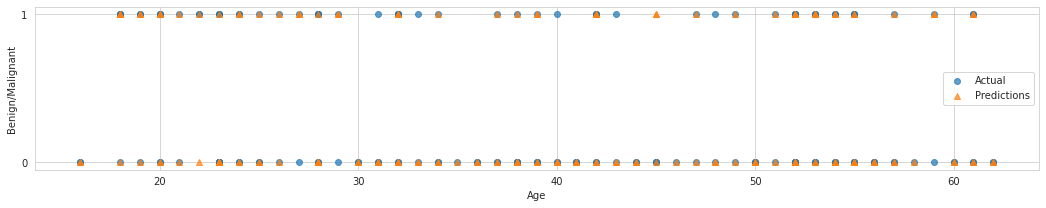

In [29]:
# Plot the predictions with the actual target

plt.figure(figsize=(18,3))
plt.scatter(X_test['age'],cancer_test_data['Actual'],label='Actual', alpha=0.7)
plt.scatter(X_test['age'],cancer_test_data['Predictions'],label='Predictions', marker='^',alpha=0.7)
plt.legend(loc=7)
plt.yticks([0,1])
plt.xlabel('Age')
plt.ylabel('Benign/Malignant')
plt.show()

The plot shows that a high percentage of the predictions matches with the actual data.

iv. Now, let us use the evaluation metrics to get a  precise idea about the model's performance.

In [30]:
# Obtain the confusion matrix

conf = confusion_matrix(y_test, y_pred)
print(conf)

[[84  7]
 [13 46]]


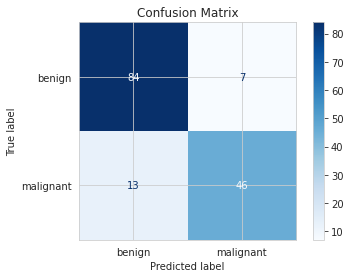

In [31]:
# Plot the confusion matrix

disp = plot_confusion_matrix(
logreg,
X_test, 
y_test,
display_labels=["benign","malignant"],
cmap = plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")

plt.show()

In [32]:
# Obtain the accuracy score

accuracy = (conf[0,0]+conf[1,1])/(conf[0,0]+conf[0,1]+conf[1,0]+conf[1,1])
print(accuracy)

0.8666666666666667


You can also get the accuracy score using the `score()` method, as shown below:

In [33]:
logreg_s = logreg.score(X_test, y_test)
print("Accuracy:", int(logreg_s *100), "%")

Accuracy: 86 %


As expected, the accuracy is not as high as the accuracy obtained when we tested the model's performance incorrectly, but still the model seems to be performing well.

Let's obtain the classification report.

In [34]:
# Obtain the classification report

print(classification_report(y_test, y_pred, labels=[0,1], target_names=['benign','malignant']))

              precision    recall  f1-score   support

      benign       0.87      0.92      0.89        91
   malignant       0.87      0.78      0.82        59

    accuracy                           0.87       150
   macro avg       0.87      0.85      0.86       150
weighted avg       0.87      0.87      0.87       150



Keep these values in mind. In the next lab, we will perform SVM classification on the same dataset, thus we can compare these metrics to the SVM classifier metrics and then will know which model is best used on this dataset.

Remember to shutdown this notebook once done from this lab.

## **Switch to LMS**

Switch to the LMS and start the next Lab (Lab 3.4 - SVM). 